# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os

# TODO: Set dataset_dir based on where you saved the training and testing data

dataset_dir = "/home/branimir/work/sdc_nanodeg/traffic_signs_data/"

training_file   = os.path.join(dataset_dir, "train.p")
validation_file = os.path.join(dataset_dir, "valid.p")
testing_file    = os.path.join(dataset_dir, "test.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Sanity check, print the shapes to verify that the data has been loaded correctly
print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print (X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = y_train.shape[0]

# Number of validation examples
n_validation = y_valid.shape[0]

# Number of testing examples.
n_test = y_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = [X_train.shape[1], X_train.shape[2]]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

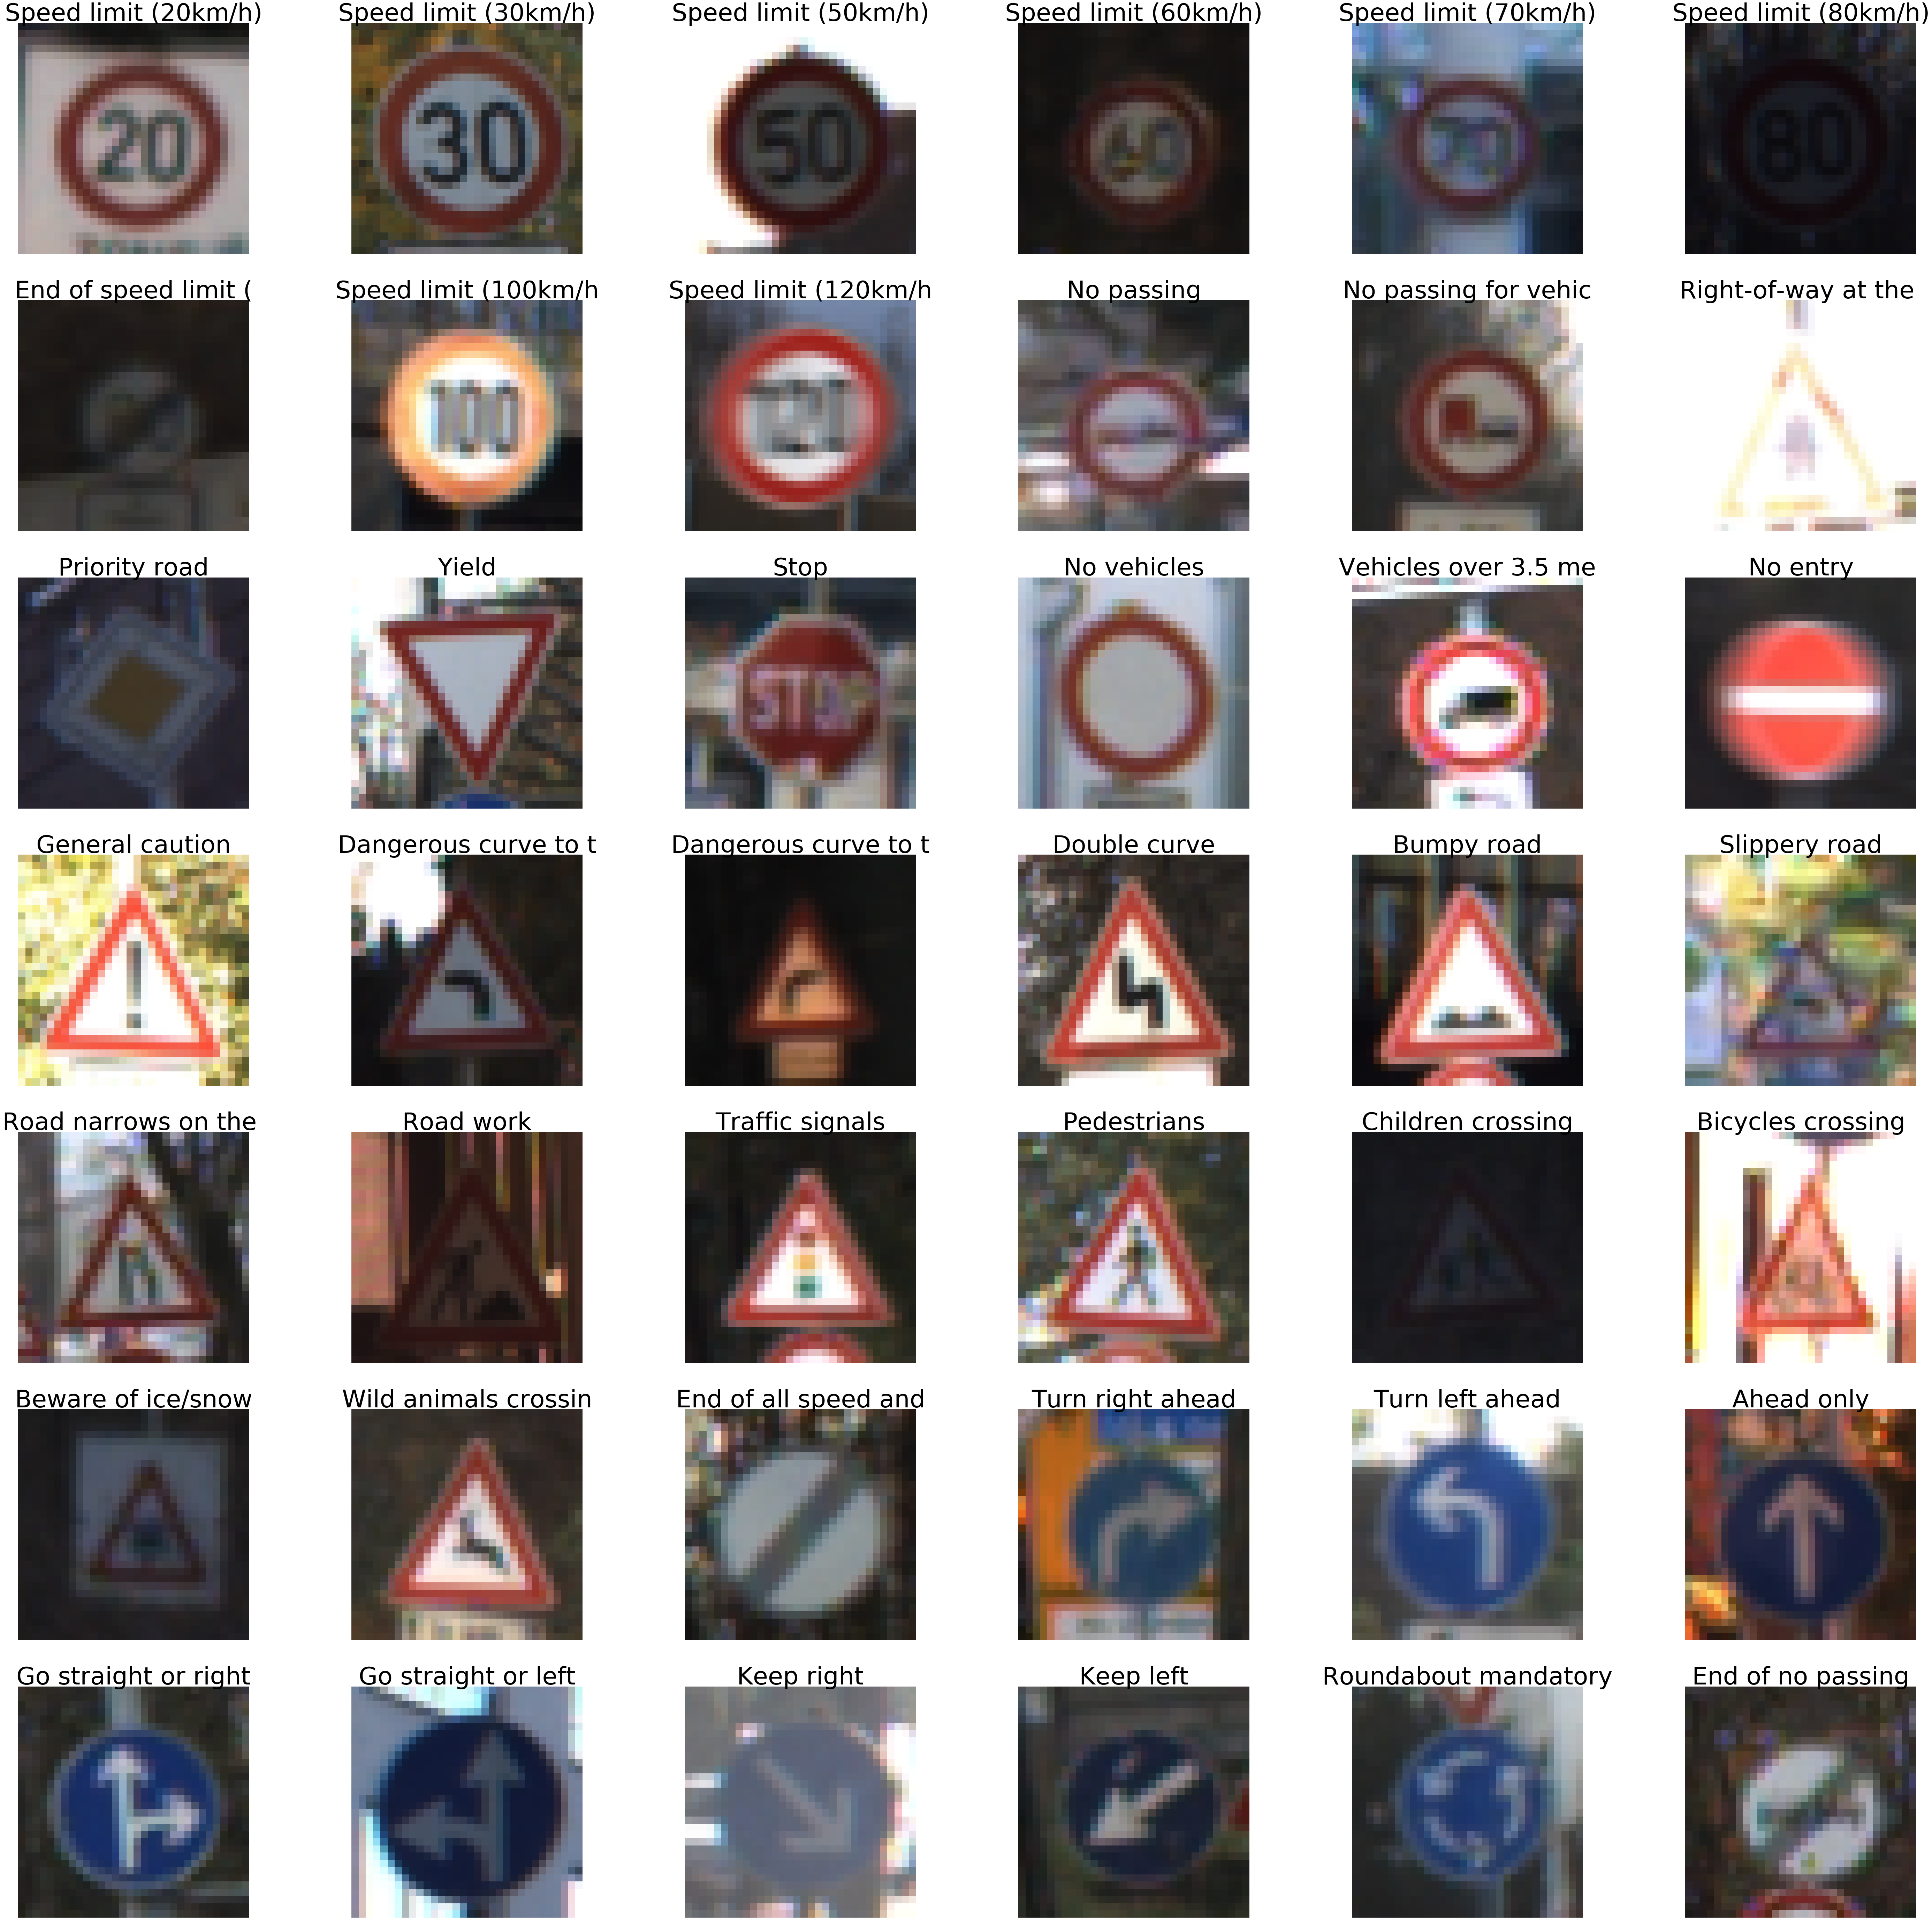

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image
import pandas as pd

# Visualizations will be shown in the notebook.
%matplotlib inline

# There are 43 classes, but we show only 42 to have a nice 7x6 grid
num_of_rows = 7
num_of_cols = 6

# Load the csv file to grab the names of the traffic signs
df = pd.read_csv('signnames.csv', index_col='ClassId')

def get_sign_name_from_class_id(df, class_id, char_limit = -1):
    '''
    Get the name of the traffic sign given its class id
    Potentially limit very long sign names to be able to display them nicely
    '''
    name = df.iloc[class_id]['SignName']
    if char_limit > 0:
        name = name[:char_limit]
    return name

def display_images_as_subplots(n_images, n_rows, n_cols, images, img_num_channels, df):
    '''
    Display images in a grid with the defined number of rows and columns
    The settings below might need to be changed to get a nice final grid on your display
    '''
    
    fig_size = 100
    sign_name_char_limit = 20
    title_font_size = 70
    
    f, axarr = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(fig_size,fig_size))
    for img_index in range(n_images):
        row_index = int(img_index / n_cols)
        col_index = (img_index - row_index * n_cols) % n_cols
        image = images[img_index]
        ax = axarr[row_index, col_index]
        if img_num_channels == 1:
            ax.imshow(image, cmap='gray')
        else:
            ax.imshow(image)
        ax.set_title(get_sign_name_from_class_id(df, img_index, sign_name_char_limit))
        ax.title.set_fontsize(title_font_size)
        ax.axis('off')
    plt.show()
        
def get_bins_and_images(n_classes, all_images_as_ndarray, labels, img_size_xy, img_num_channels):
    '''
    This method parses all the classes in the input dataset. 
    For each class, get the number of examples in the dataset. This helps us understand how much is
    each class represented in the dataset compared to other classes (we will plot this later)
    Also, for each class, grab a random image and add it to the list, which will later be displayed
    '''
    
    num_examples_per_class = []
    images_to_display = []
    
    for class_id in range(n_classes):
        class_examples = np.argwhere(labels == class_id)
        num_examples = len(class_examples)
        num_examples_per_class.append(num_examples)
        
        # Do not display class 43, we only have 42 grid places
        if class_id == n_classes-1:
            break
            
        # Grab a random image for the class and store it in the output list
        # The shape of the image depends on the number of the output channels (1 or 3 for
        # grayscale and rgb, respectively)
        index = class_examples[np.random.randint(num_examples)]
        image_as_ndarray = all_images_as_ndarray[index]
        if img_num_channels == 3:
            image_as_ndarray = image_as_ndarray.reshape([img_size_xy,img_size_xy,img_num_channels])
        else:
            image_as_ndarray = image_as_ndarray.reshape([img_size_xy,img_size_xy])
        image = Image.fromarray(image_as_ndarray)
        images_to_display.append(image)
        
    return num_examples_per_class, images_to_display

num_examples_per_class, images_to_display = get_bins_and_images(n_classes, X_train, train['labels'], 32, 3)   
display_images_as_subplots(n_classes-1, num_of_rows, num_of_cols, images_to_display, 3, df)

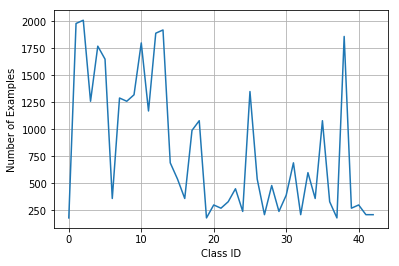

In [4]:
# Plot the number of examples per class
# It is apparent that not all classes are equally represented during training, so the 
# network might learn the more represented examples better
plt.plot(np.arange(0,43,1), num_examples_per_class)
plt.xlabel('Class ID')
plt.ylabel('Number of Examples')
plt.grid(True)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocessing the input data

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing

def rgb2gray(rgb):
    '''
    Return the grayscale version of the image
    '''
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def normalize(img):
    '''
    Return the scaled version of the image
    This method scales the image to have zero mean and unit variance
    '''
    return preprocessing.scale(img)

def rgb2gray_and_normalize_dataset(dataset_orig):
    '''
    The procedure takes the images in the original dataset, and then converts it to
    the grayscale version and the grayscale+normaliza version. Both are returned. 
    '''
    dataset_g_shape = [dataset_orig.shape[0], dataset_orig.shape[1], dataset_orig.shape[2], 1]
    dataset_g = np.empty(shape=dataset_g_shape)
    dataset_g_n = np.copy(dataset_g)
    
    for i in range(len(dataset_orig)):
        img_i = dataset_orig[i]
        img_i_g = rgb2gray(img_i)
        img_i_g_n = normalize(img_i_g)
        dataset_g[i] = np.array(img_i_g).reshape([32, 32, 1])
        dataset_g_n[i] = np.array(img_i_g_n).reshape([32, 32, 1])
    
    return dataset_g, dataset_g_n

'''
x_train_g_shape = [X_train.shape[0], X_train.shape[1], X_train.shape[2], 1]
x_valid_g_shape = [X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1]
x_test_g_shape  = [X_test.shape[0], X_test.shape[1], X_test.shape[2], 1]

# These arrays contain grayscale versions of the images in the dataset, but not nromalized
X_train_g, X_valid_g, X_test_g = np.empty(shape=x_train_g_shape), np.empty(shape=x_valid_g_shape), np.empty(shape=x_test_g_shape)

# These arrays contain images that are both grayscale and normalized
X_train_g_n, X_valid_g_n, X_test_g_n = np.copy(X_train_g), np.copy(X_valid_g), np.copy(X_test_g)

# Loop through the dataset and populate the grayscale and grayscale+normalize arrays

for i in range(len(X_train)):
    img_i = X_train[i]
    img_i_g = rgb2gray(img_i)
    img_i_g_n = normalize(img_i_g)
    X_train_g[i] = np.array(img_i_g).reshape([32, 32, 1])
    X_train_g_n[i] = np.array(img_i_g_n).reshape([32, 32, 1])
    
for i in range(len(X_test)):
    img_i = X_test[i]
    img_i_g = rgb2gray(img_i)
    img_i_g_n = normalize(img_i_g)
    X_test_g[i] = np.array(img_i_g).reshape([32, 32, 1])
    X_test_g_n[i] = np.array(img_i_g_n).reshape([32, 32, 1])
    
for i in range(len(X_valid)):
    img_i = X_valid[i]
    img_i_g = rgb2gray(img_i)
    img_i_g_n = normalize(img_i_g)
    X_valid_g[i] = np.array(img_i_g).reshape([32, 32, 1])
    X_valid_g_n[i] = np.array(img_i_g_n).reshape([32, 32, 1])
'''
X_train_g, X_train_g_n = rgb2gray_and_normalize_dataset(X_train)
X_valid_g, X_valid_g_n = rgb2gray_and_normalize_dataset(X_valid)
X_test_g,  X_test_g_n  = rgb2gray_and_normalize_dataset(X_test)

# Sanity check, print the shapes to verify that the data has been converted correctly
print (X_train_g.shape, X_train_g_n.shape, y_train.shape)
print (X_valid_g.shape, X_valid_g_n.shape, y_valid.shape)
print (X_test_g.shape, X_test_g_n.shape, y_test.shape)

/home/branimir/work/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(34799, 32, 32, 1) (34799, 32, 32, 1) (34799,)
(4410, 32, 32, 1) (4410, 32, 32, 1) (4410,)
(12630, 32, 32, 1) (12630, 32, 32, 1) (12630,)


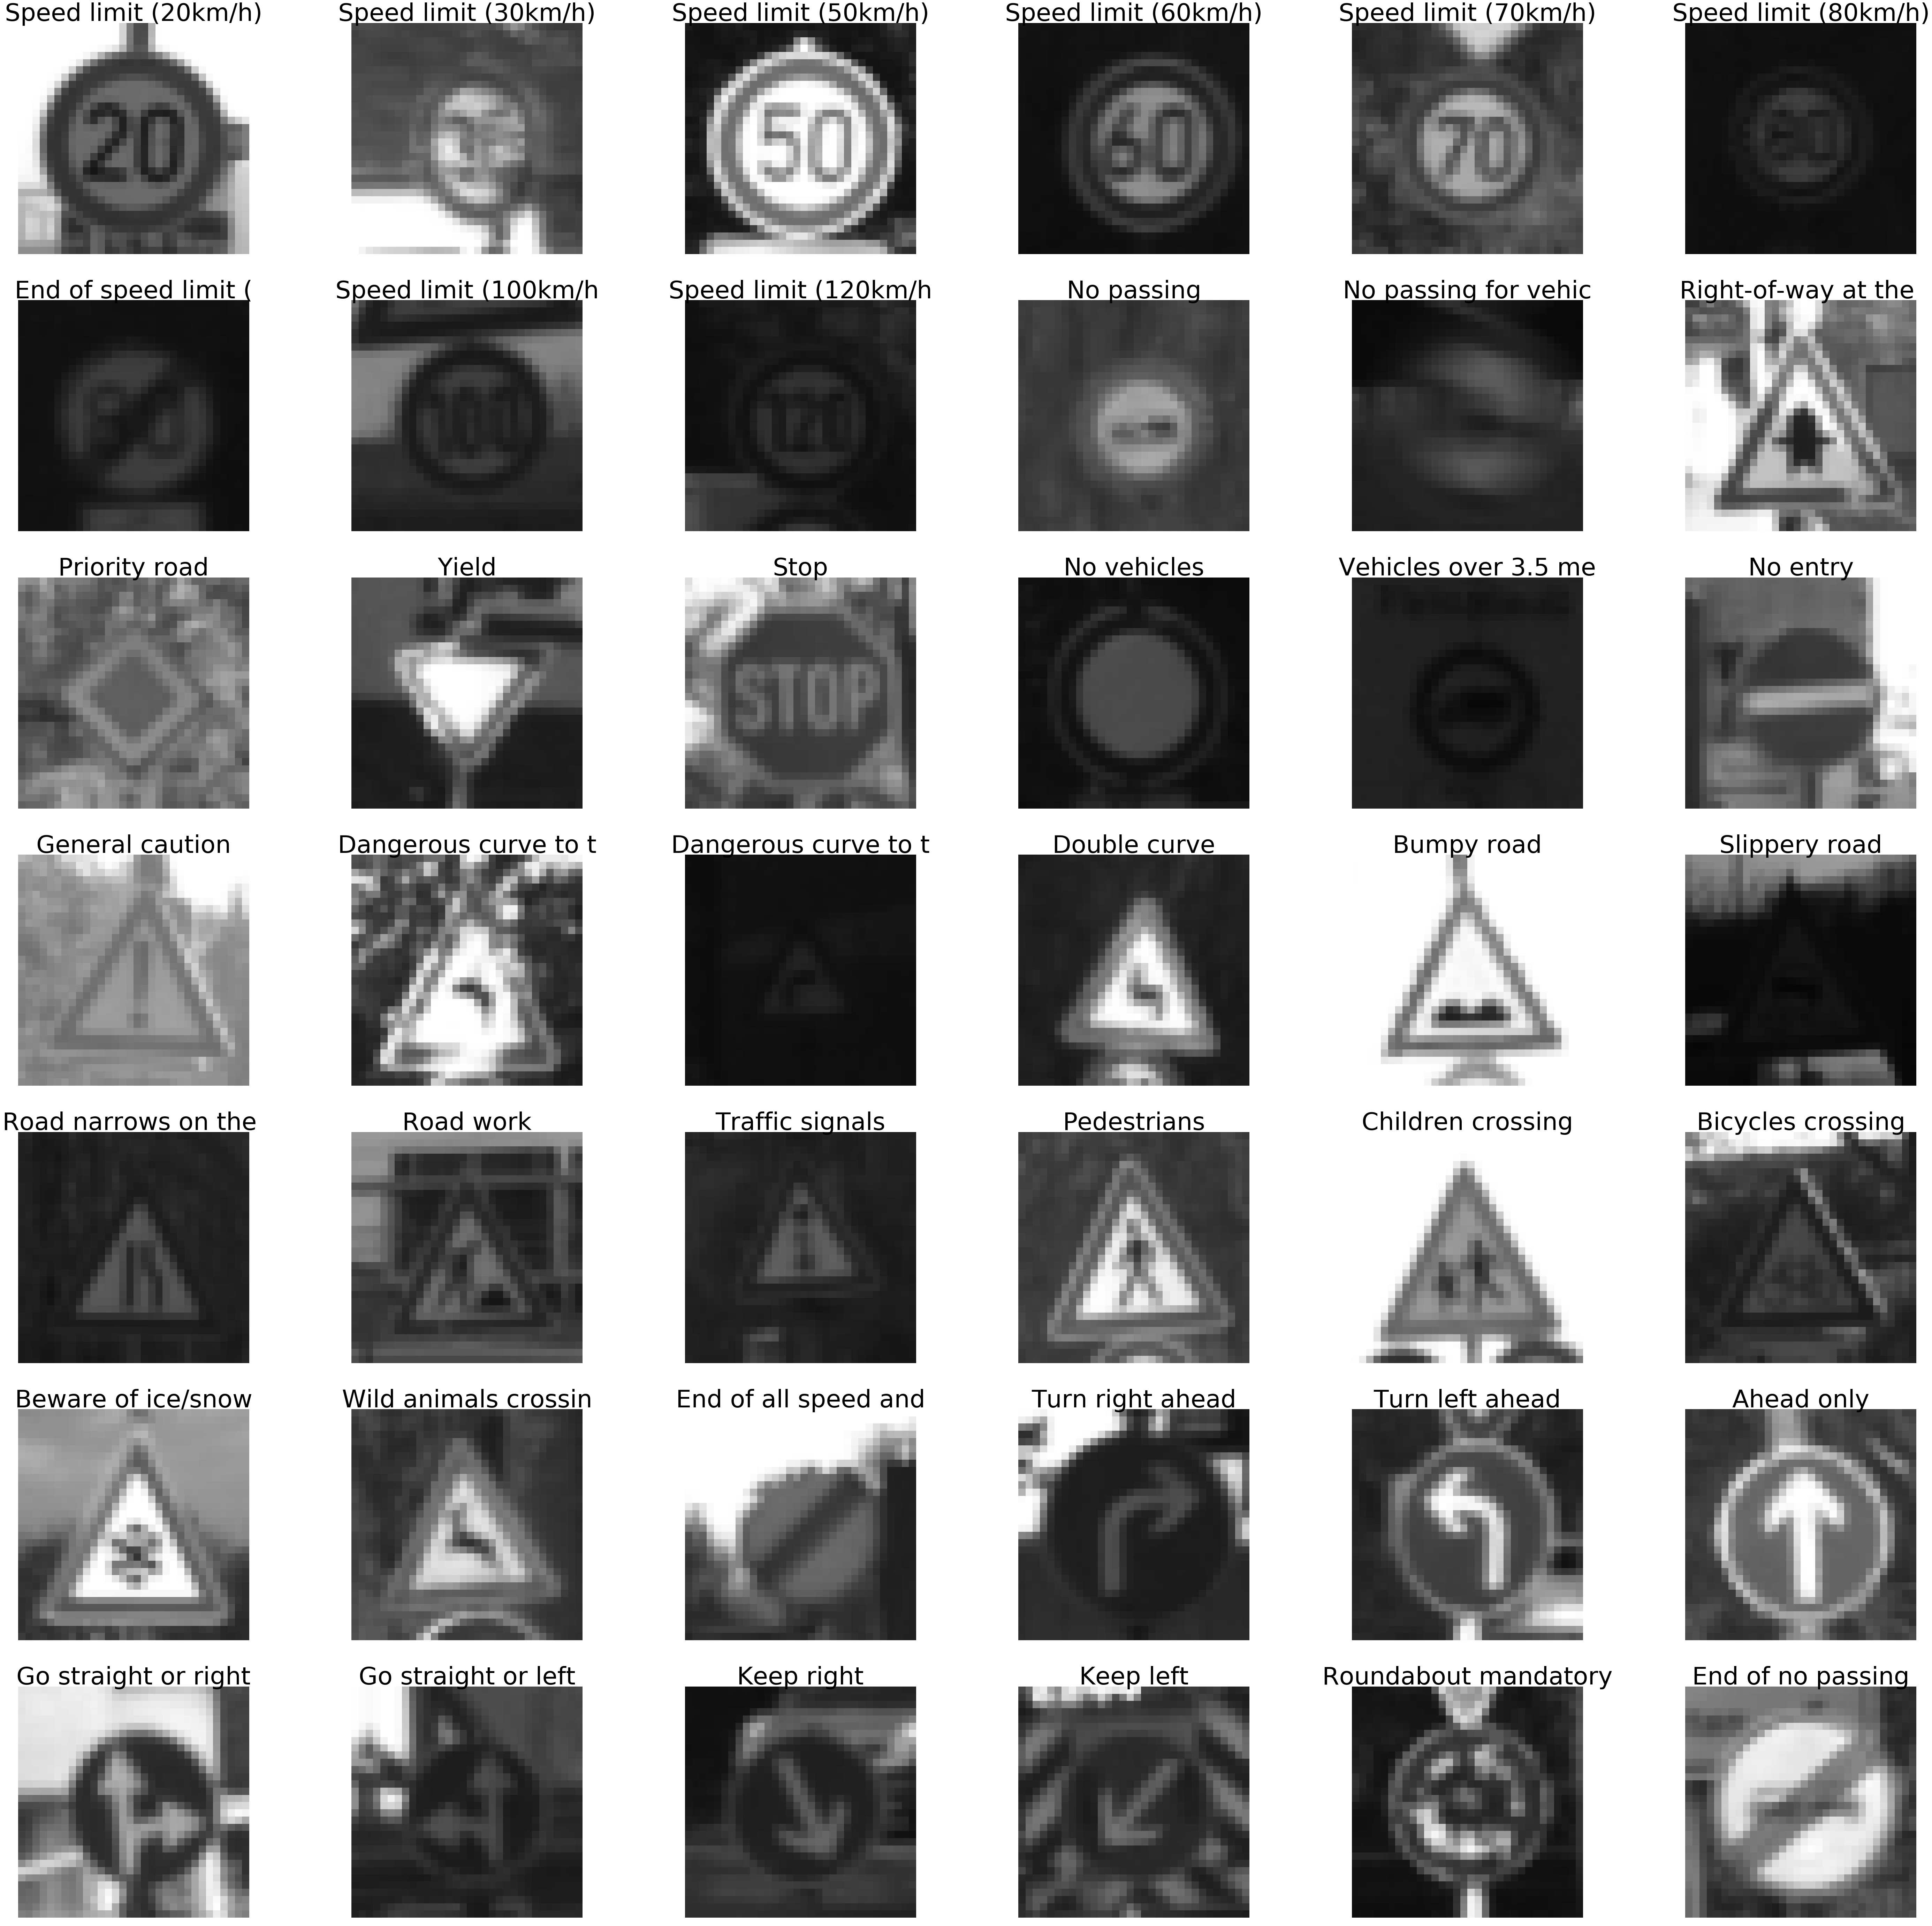

In [6]:
# Display the same pictures as before, but this time with grayscale conversion  
_, images_to_display = get_bins_and_images(n_classes, X_train_g, train['labels'], 32, 1)   
display_images_as_subplots(n_classes-1, num_of_rows, num_of_cols, images_to_display, 1, df)

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

# Define the number of channels in the input 
# Can be 1 (grayscale) or 3 (rgb)
num_in_channels = 1 # tf.placeholder(tf.int32, (None))

# Variables
x = tf.placeholder(tf.float32, (None, 32, 32, num_in_channels))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
mu = 0
sigma = 0.1

# First conv layer
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, num_in_channels, 6), mean = mu, stddev = sigma), name='conv1w')
conv1_b = tf.Variable(tf.zeros(6), name='conv1b')
conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
conv1 = tf.nn.relu(conv1)
conv1 = tf.nn.dropout(conv1, keep_prob)

# First max-pooling layer
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Second conv layer
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='conv2w')
conv2_b = tf.Variable(tf.zeros(16), name='conv2b')
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
conv2 = tf.nn.relu(conv2)
conv2 = tf.nn.dropout(conv2, keep_prob)

# Second max-pooling layer
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Flatten before going to fully connected layers
fc0 = flatten(conv2)

# First fully connected layer
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='fc1w')
fc1_b = tf.Variable(tf.zeros(120),name='fc1b')
fc1   = tf.matmul(fc0, fc1_W) + fc1_b
fc1   = tf.nn.relu(fc1)
# fc1   = tf.nn.dropout(fc1, dropout)

# Second fully connected layer
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='fc2w')
fc2_b  = tf.Variable(tf.zeros(84),name='fc2b')
fc2    = tf.matmul(fc1, fc2_W) + fc2_b
fc2    = tf.nn.relu(fc2)
# fc2    = tf.nn.dropout(fc2, dropout)

# Third fully connected layer
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma),name='fc3w')
fc3_b  = tf.Variable(tf.zeros(43),name='fc3b')

logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b, name='lastop')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train the model and report the accuracy on the validation and test datasets

from sklearn.utils import shuffle

# Defining a batch variable
batch = tf.Variable(0, dtype=tf.float32)

# Define some training hyperparameters
EPOCHS = 60
BATCH_SIZE = 128
dropout = 0.5

# Training hyper-parameters for the case we use the decaying learning rate
rate = 0.0005
step_rate = 10
decay = 0.95

learning_rate = tf.train.exponential_decay(
      rate,               # Base learning rate.
      batch * BATCH_SIZE, # Current index into the dataset.
      100000,             # Decay step.
      0.99,               # Decay rate.
      staircase=True)

# A flag defining if we use the decaying or the constant learning rate
use_decaying_learning_rate = True
if use_decaying_learning_rate == True:
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, epsilon=0.01)
else:
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)

one_hot_y = tf.one_hot(y, 43)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# Adding L2 loss  
lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in tf.trainable_variables() if 'w' in v.name ]) * 0.001
loss_operation = tf.reduce_mean(cross_entropy + lossL2)

# Define the training operation
training_operation = optimizer.minimize(loss_operation, global_step=batch)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    '''
    Evaluates the model using the input data and labels
    It returns the value between 0 and 1 
    '''
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print("Number of input channels: " + str(num_in_channels))
    for i in range(EPOCHS):
        if num_in_channels == 3:
            X_train_e, y_train_e = shuffle(X_train, y_train)
        else:
            X_train_e, y_train_e = shuffle(X_train_g_n, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            # print(offset, end)
            batch_x, batch_y = X_train_e[offset:end], y_train_e[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:dropout})
          
        if num_in_channels == 3:
            validation_accuracy = evaluate(X_valid, y_valid)
        else:
            validation_accuracy = evaluate(X_valid_g_n, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        if use_decaying_learning_rate == True:
            print('Learning rate: %f' % (sess.run(optimizer._lr)))
        else:
            print('Learning rate: %f' % (optimizer._lr))
        print()
        
    saver.save(sess, 'trained_models/lenet.ckpt')
    print("Model saved")

Training...
Number of input channels: 1
EPOCH 1 ...
Validation Accuracy = 0.395
Learning rate: 0.000500

EPOCH 2 ...
Validation Accuracy = 0.652
Learning rate: 0.000500

EPOCH 3 ...
Validation Accuracy = 0.729
Learning rate: 0.000495

EPOCH 4 ...
Validation Accuracy = 0.777
Learning rate: 0.000495

EPOCH 5 ...
Validation Accuracy = 0.838
Learning rate: 0.000495

EPOCH 6 ...
Validation Accuracy = 0.844
Learning rate: 0.000490

EPOCH 7 ...
Validation Accuracy = 0.866
Learning rate: 0.000490

EPOCH 8 ...
Validation Accuracy = 0.877
Learning rate: 0.000490

EPOCH 9 ...
Validation Accuracy = 0.880
Learning rate: 0.000485

EPOCH 10 ...
Validation Accuracy = 0.889
Learning rate: 0.000485

EPOCH 11 ...
Validation Accuracy = 0.891
Learning rate: 0.000485

EPOCH 12 ...
Validation Accuracy = 0.905
Learning rate: 0.000480

EPOCH 13 ...
Validation Accuracy = 0.898
Learning rate: 0.000480

EPOCH 14 ...
Validation Accuracy = 0.897
Learning rate: 0.000480

EPOCH 15 ...
Validation Accuracy = 0.901
Lear

In [10]:
# Check the accuracy on the test dataset

with tf.Session() as sess:   

    saver = tf.train.import_meta_graph('trained_models/lenet.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('trained_models/'))

    graph = tf.get_default_graph()

    if num_in_channels == 3:
        test_accuracy = evaluate(X_test, y_test)
    else:
        test_accuracy = evaluate(X_valid_g_n, y_valid)
        print("Test dataset accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from trained_models/lenet.ckpt
Test dataset accuracy = 0.946


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

File to test: ['11_rightofway.jpg', '14_stop.jpg', '17_noentry.jpg', '17_noentry_crop.jpg', '23_slippery.jpg', '23_slippery_crop.jpg', '25_roadwork.jpg', '25_roadwork_2.jpg']
Corresponding labels: [11, 14, 17, 17, 23, 23, 25, 25]


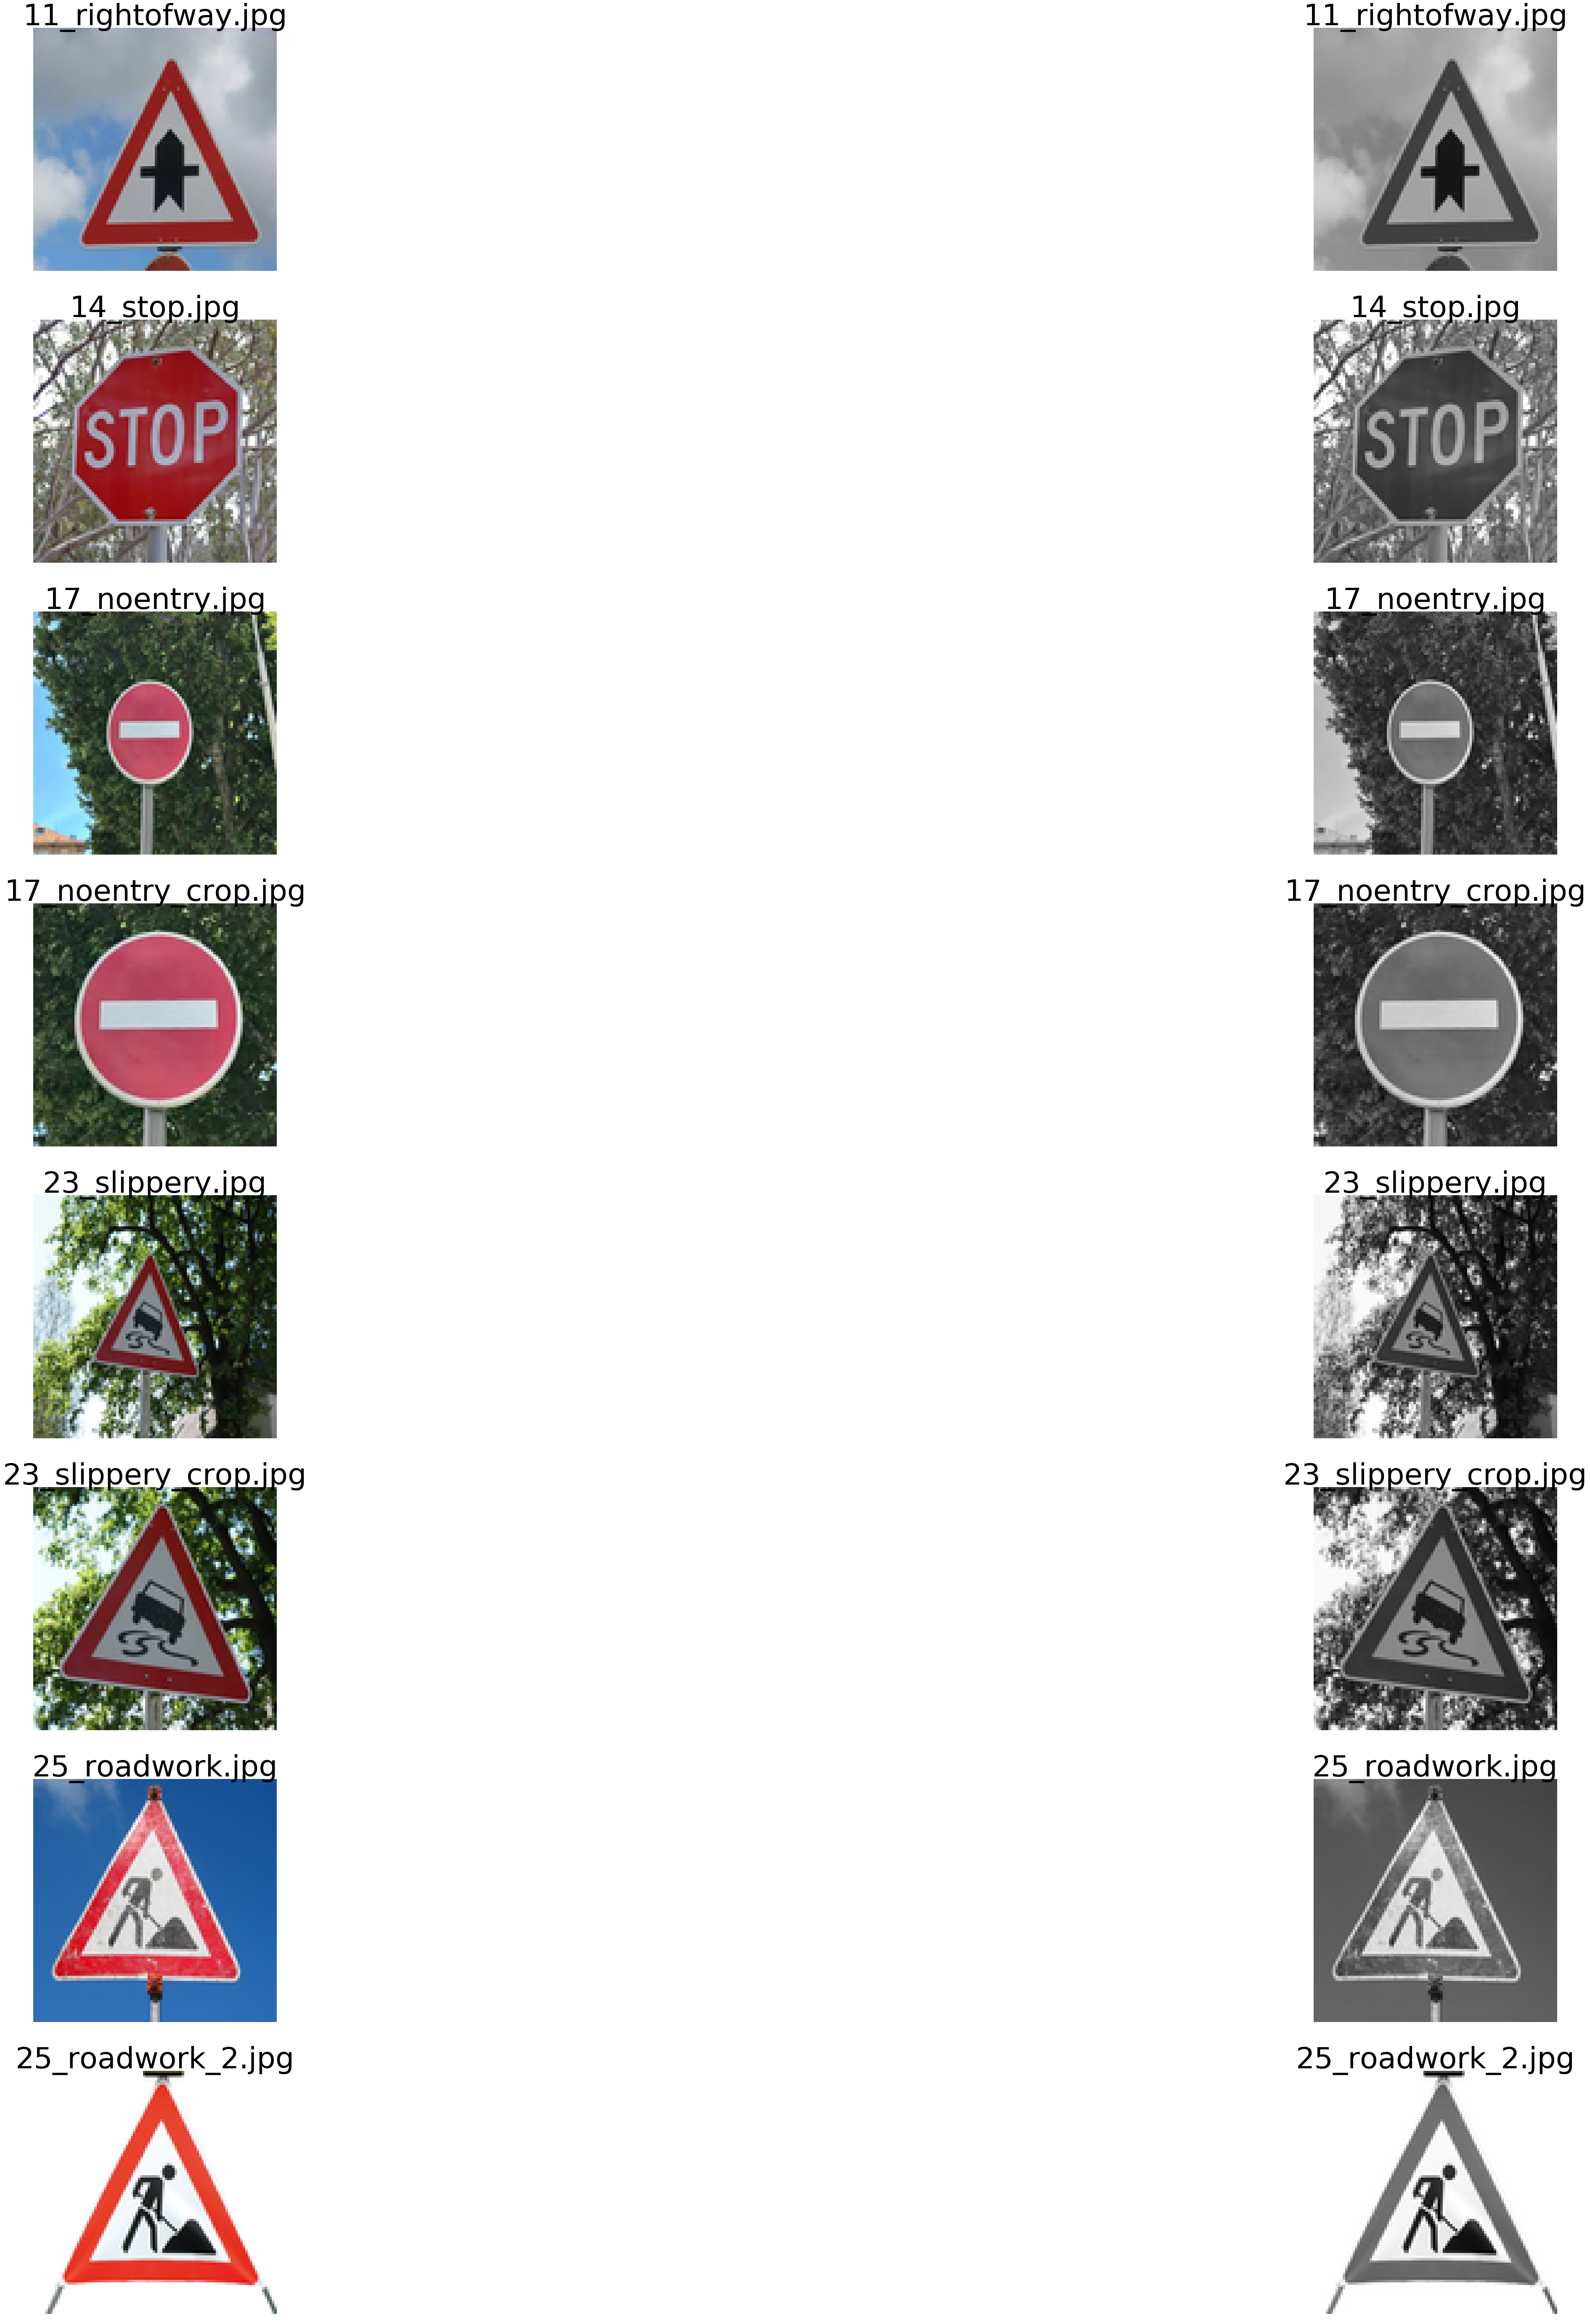

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

img_dir = "test_images/"

f, axarr = plt.subplots(nrows=8, ncols=2, figsize=(100,100))

count = 0
list_of_images, list_of_labels = [], []
list_of_files = os.listdir(img_dir)
list_of_files.sort()

for img_file_name in list_of_files:
    img_path = img_dir + img_file_name
    image = Image.open(img_path)
    image_arr = np.array(image)
    image_arr_g = rgb2gray(image_arr)
    image_arr_g_n = normalize(image_arr_g)
    image_100 = Image.fromarray(image_arr).resize((100,100), Image.ANTIALIAS)
    image_100_g = Image.fromarray(image_arr_g).resize((100,100), Image.ANTIALIAS)
    image_32  = Image.fromarray(image_arr).resize((32,32), Image.ANTIALIAS)
    image_32_g = Image.fromarray(image_arr_g).resize((32,32), Image.ANTIALIAS)
    image_32_g_n = Image.fromarray(image_arr_g_n).resize((32,32), Image.ANTIALIAS)

    ax = axarr[count, 0]
    ax.axis('off')
    ax.set_title(img_file_name)
    ax.title.set_fontsize(70)
    ax.imshow(image_100)
    ax = axarr[count, 1]    
    ax.axis('off')
    ax.set_title(img_file_name)
    ax.title.set_fontsize(70)
    ax.imshow(image_100_g, cmap='gray')
    
    count += 1
    
    list_of_images.append(np.array(image_32_g_n).reshape([32,32,1]))
    label = int(img_file_name.split('_')[0])
    list_of_labels.append(label)
    
print("File to test:", list_of_files)
print("Corresponding labels:", list_of_labels)
plt.show()

### Predict the Sign Type for Each Image

In [12]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

count_correct, count_incorrect = 0, 0

with tf.Session() as sess:   

    saver = tf.train.import_meta_graph('trained_models/lenet.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('trained_models/'))

    graph = tf.get_default_graph()
    
    for index in range(len(list_of_files)):
        
        print ("--------")
        
        img_data = list_of_images[index]
        img_file_name = list_of_files[index]
        img_label = list_of_labels[index]

        logit_vals = sess.run(logits, feed_dict={x: img_data.reshape([1,32,32,1]), y: img_label, keep_prob:1.0})
        pred_id = logit_vals.argmax()
        
        if pred_id == img_label:
            print("Image correctly classified:", img_file_name, "as class", pred_id)
            count_correct += 1
        else:
            print("Image incorrectly classified:", img_file_name, "as class", pred_id)
            count_incorrect += 1

INFO:tensorflow:Restoring parameters from trained_models/lenet.ckpt
--------
Image correctly classified: 11_rightofway.jpg as class 11
--------
Image correctly classified: 14_stop.jpg as class 14
--------
Image incorrectly classified: 17_noentry.jpg as class 0
--------
Image correctly classified: 17_noentry_crop.jpg as class 17
--------
Image incorrectly classified: 23_slippery.jpg as class 38
--------
Image correctly classified: 23_slippery_crop.jpg as class 23
--------
Image correctly classified: 25_roadwork.jpg as class 25
--------
Image correctly classified: 25_roadwork_2.jpg as class 25


### Analyze Performance

In [13]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# Using the evaluate function

with tf.Session() as sess:   

    saver = tf.train.import_meta_graph('trained_models/lenet.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('trained_models/'))

    graph = tf.get_default_graph()
    
    print("Accuracy:", evaluate(list_of_images, list_of_labels))

INFO:tensorflow:Restoring parameters from trained_models/lenet.ckpt
Accuracy: 0.75


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [14]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
 
def get_top_5_indices(arr):
    # top_5 = arr.argsort()[-3:][::-1]
    # print (arr.shape)
    # print(np.argsort(arr))
    top_5 = np.argsort(arr)[-5:][::-1]
    
    # top_5 = np.argpartition(arr, -5)[-5]
    # return top_5
    return top_5

with tf.Session() as sess:   

    saver = tf.train.import_meta_graph('trained_models/lenet.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('trained_models/'))

    graph = tf.get_default_graph()
    
    for index in range(len(list_of_files)):
        
        print ("--------")
        
        img_data = list_of_images[index]
        img_file_name = list_of_files[index]
        img_label = list_of_labels[index]
        
        softm = tf.nn.softmax(logits)
        logit_vals = sess.run(softm, feed_dict={x: img_data.reshape([1,32,32,1]), y: img_label, keep_prob:1.0})        
        pred_id = logit_vals.argmax()
        
        print("Image", img_file_name, "predicted as", pred_id)
        
        '''    
        top_5 = get_top_5_indices(logit_vals[0])
        print("Top 5 classes and values: ", top_5, logit_vals[0][top_5])
        '''
        
        top_5 = tf.nn.top_k(logit_vals, 5)
        
        print("Top 5 classes", top_5.indices.eval())
        print("Top 5 values", top_5.values.eval())

INFO:tensorflow:Restoring parameters from trained_models/lenet.ckpt
--------
Image 11_rightofway.jpg predicted as 11
Top 5 classes [[11 30 21 12 27]]
Top 5 values [[ 0.92752033  0.06129503  0.00334978  0.00217773  0.00173397]]
--------
Image 14_stop.jpg predicted as 14
Top 5 classes [[14 33 13 17 34]]
Top 5 values [[ 0.91339582  0.01729976  0.01514864  0.0130596   0.00775108]]
--------
Image 17_noentry.jpg predicted as 0
Top 5 classes [[ 0  1  8 33 36]]
Top 5 values [[ 0.25731021  0.10710046  0.09363007  0.0816074   0.05592449]]
--------
Image 17_noentry_crop.jpg predicted as 17
Top 5 classes [[17  9 33 16 35]]
Top 5 values [[ 0.48428649  0.17560029  0.10189056  0.09391738  0.05823837]]
--------
Image 23_slippery.jpg predicted as 38
Top 5 classes [[38 25 31 11 23]]
Top 5 values [[ 0.29157507  0.14607479  0.12122528  0.0940006   0.04848812]]
--------
Image 23_slippery_crop.jpg predicted as 23
Top 5 classes [[23 11 19 21 31]]
Top 5 values [[ 0.41349074  0.19613142  0.11798017  0.07410568

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [15]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")